LAB 1 MACHINE LEARNING

In [2]:
import monkdata as m
from dtree import *
import math
from drawtree_qt5 import *
import numpy as np
import matplotlib.pyplot as plt
import random

Asignment 0

MONK-2 is the dataset which is the most difficult for a decision algorithm to learn: its condition may required a very large dataset to ensure all possibilities are represented. Also, the tree may be very complicated to build whereas the other trees are more explicit.

Assignment 1



In [93]:
def compute_entropy(dataset):
    l = len(dataset)
    class0 = 0
    class1 = 0
    for i in range(l):
        if dataset[i].positive:
            class1 += 1
        else:
            class0 += 1
    
    prop0 = class0/l
    prop1 = class1/l

    return -prop0*math.log2(prop0) - prop1*math.log2(prop1)



print('Entropy of MONK-1 is:')
print(compute_entropy(m.monk1))
#print(entropy(m.monk1))
print('---------------------')
print('Entropy of MONK-2 is')  
print(compute_entropy(m.monk2))
#print(entropy(m.monk2))
print('---------------------')
print('Entropy of MONK-3 is') 
print(compute_entropy(m.monk3))
#print(entropy(m.monk3))

Entropy of MONK-1 is:
1.0
---------------------
Entropy of MONK-2 is
0.957117428264771
---------------------
Entropy of MONK-3 is
0.999806132804711


Assignment 2

Entropy measures the uncertainty of a dataset. Thus, an uniform distribution will have a higher entropy than a non-uniform distribution.

In [4]:
uni = np.random.uniform(0,3,100)
not_uni = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2]


def entropy_uniform(dataset):
    l = len(dataset)
    class0 = 0
    class1 = 0
    class2 = 0
    for i in range(l):
        if dataset[i] < 1:
            class0+=1
        if dataset[i] < 2 and dataset[i] >= 1:
            class1+=1
        else:
            class2+=1
    
    prop0 = class0/l
    prop1 = class1/l
    prop2 = class2/l

    return -prop0*math.log2(prop0) - prop1*math.log2(prop1) - prop2*math.log2(prop2)

print('Entropy of the uniform distribution is:')
print(entropy_uniform(uni))
print('Entropy of the not uniform distribution is:')
print(entropy_uniform(not_uni))


Entropy of the uniform distribution is:
1.4569035442162859
Entropy of the not uniform distribution is:
0.5823812935032302


Assignment 3

In [102]:
the_dataset = [m.monk1, m.monk2, m.monk3]

print('FOR MONK-1:')
for i in range(len(m.attributes)):
    print(m.attributes[i], ': ', averageGain(the_dataset[0], m.attributes[i]))

print('----------------------')

print('FOR MONK-2:')
for i in range(len(m.attributes)):
    print(m.attributes[i], ': ', averageGain(the_dataset[1], m.attributes[i]))

print('----------------------')

print('FOR MONK-3:')
for i in range(len(m.attributes)):
    print(m.attributes[i], ': ', averageGain(the_dataset[2], m.attributes[i]))

print('----------------------')


FOR MONK-1:
A1 :  0.07527255560831925
A2 :  0.005838429962909286
A3 :  0.00470756661729721
A4 :  0.02631169650768228
A5 :  0.28703074971578435
A6 :  0.0007578557158638421
----------------------
FOR MONK-2:
A1 :  0.0037561773775118823
A2 :  0.0024584986660830532
A3 :  0.0010561477158920196
A4 :  0.015664247292643818
A5 :  0.01727717693791797
A6 :  0.006247622236881467
----------------------
FOR MONK-3:
A1 :  0.007120868396071844
A2 :  0.29373617350838865
A3 :  0.0008311140445336207
A4 :  0.002891817288654397
A5 :  0.25591172461972755
A6 :  0.007077026074097326
----------------------


For splitting the examples at the root node, we choose the maximum attribute because it is the one that gives the most information. 

MONK-1: a5

MONK-2: a5

MONK-3: a2

Assignment 4

When the information gain is maximized, the entropy of the subsets are minimized.
After the split, the resulting entropy are minimized which means that the data set got more predictibled: this is the goal of the decision tree.

Assignment 5

Then we test all the attributes except the one that got just splitted (for MONK-1 for example, it is a5)

In [4]:
#MONK-1
attribute_depth_1 = m.attributes[4]
values_depth_1 = attribute_depth_1.values
data_split_1=[]
for i in range(len(values_depth_1)):
    data_split_1.append(select(m.monk1, attribute_depth_1, values_depth_1[i]))  #len(data_split_1) = 4 (a5 has 4 values)


print('FOR value = 1:')
for i in range(6):
    print(m.attributes[i], ': ',averageGain(data_split_1[0], m.attributes[i]))

print('----------------------')

print('FOR value = 2:')
for i in range(6):
    print(m.attributes[i], ': ',averageGain(data_split_1[1], m.attributes[i]))

print('----------------------')

print('FOR value = 3:')
for i in range(6):
    print(m.attributes[i], ': ',averageGain(data_split_1[2], m.attributes[i]))

print('----------------------')

print('FOR value = 4:')
for i in range(6):
    print(m.attributes[i], ': ',averageGain(data_split_1[3], m.attributes[i]))


#a5 should not be tested since it was splitted

FOR value = 1:
A1 :  0.0
A2 :  0.0
A3 :  0.0
A4 :  0.0
A5 :  0.0
A6 :  0.0
----------------------
FOR value = 2:
A1 :  0.040216841609413634
A2 :  0.015063475072186083
A3 :  0.03727262736015946
A4 :  0.04889220262952931
A5 :  0.0
A6 :  0.025807284723902146
----------------------
FOR value = 3:
A1 :  0.03305510013455182
A2 :  0.002197183539100922
A3 :  0.017982293842278896
A4 :  0.01912275517747053
A5 :  0.0
A6 :  0.04510853782483648
----------------------
FOR value = 4:
A1 :  0.20629074641530198
A2 :  0.033898395077640586
A3 :  0.025906145434984817
A4 :  0.07593290844153944
A5 :  0.0
A6 :  0.0033239629631565126


So we split in the following way:

Value = 1: end leaf

Value = 2: split A4

Value = 3: split A6

Value = 4: split A1


In [16]:
print('End Leaf for value = 1')
print(mostCommon(data_split_1[0]))

print('------------------------')

print('For value = 2:')
attribute_depth_2_1 = m.attributes[3]
print(m.attributes[3])
values_depth_2_1 = attribute_depth_2_1.values

data_split_2_1=[]
for i in range(len(values_depth_2_1)):
    data_split_2_1.append(select(data_split_1[1], attribute_depth_2_1, values_depth_2_1[i])) 

for i in range(len(data_split_2_1)):
    print(mostCommon(data_split_2_1[i]))

print('------------------------')

print('For value = 3:')
attribute_depth_2_2 = m.attributes[5]
print(m.attributes[5])
values_depth_2_2 = attribute_depth_2_2.values
data_split_2_2=[]
for i in range(len(values_depth_2_2)):
    data_split_2_2.append(select(data_split_1[2], attribute_depth_2_2, values_depth_2_2[i]))  

for i in range(len(data_split_2_2)):
    print(mostCommon(data_split_2_2[i]))


print('------------------------')

print('For value = 4:')
attribute_depth_2_3 = m.attributes[0]
print(m.attributes[0])
values_depth_2_3 = attribute_depth_2_3.values
data_split_2_3=[]
for i in range(len(values_depth_2_3)):
    data_split_2_3.append(select(data_split_1[3], attribute_depth_2_3, values_depth_2_3[i]))  

for i in range(len(data_split_2_3)):
    print(mostCommon(data_split_2_3[i]))


#drawTree(buildTree(m.monk1,m.attributes,2))


End Leaf for value = 1
True
------------------------
For value = 2:
A4
False
False
False
------------------------
For value = 3:
A6
False
False
------------------------
For value = 4:
A1
False
False
True


In [4]:
print('MONK-1')

tree1 = buildTree(m.monk1, m.attributes)


print('E_train: ', check(tree1, m.monk1))
print('E_test: ', check(tree1, m.monk1test))

print('--------------------------------------------------')

print('MONK-2')

tree2 = buildTree(m.monk2, m.attributes)
print('E_train ', check(tree2, m.monk2))
print('E_test: ', check(tree2, m.monk2test))


print('--------------------------------------------------')

print('MONK-3')

tree3 = buildTree(m.monk3, m.attributes)
print('E_train: ', check(tree3, m.monk3))
print('E_test: ', check(tree3, m.monk3test))



def complete_pruning(tree, testdata):
    best_tree = tree
    performance = 0
    new_performance = check(tree,testdata)
    while performance - new_performance <0:
        performance = new_performance
        the_trees = allPruned(best_tree)
        best_score = 0
        for elt in the_trees:
            score = check(elt, testdata)
            if score > best_score:
                best_score = score
                best_tree = elt
        new_performance = best_score

    return best_tree

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]



MONK-1
E_train:  1.0
E_test:  0.8287037037037037
--------------------------------------------------
MONK-2
E_train  1.0
E_test:  0.6921296296296297
--------------------------------------------------
MONK-3
E_train:  1.0
E_test:  0.9444444444444444


As expected, the accuracy on the training dataset is 1.
As expected, the accuracy for MONK-2 test dataset is the lowest.

Assignment 6

The usual process of building a decision tree is likely to overfit the data because the resulting tree might be too complex: small bias and high variance.
Pruning allows the building of a simpler tree, which will decrease the variance at the cost of little bias. This will make the classification easier to understand.

Assignemnt 7

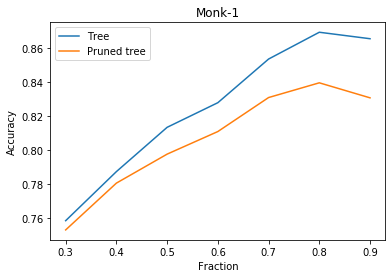

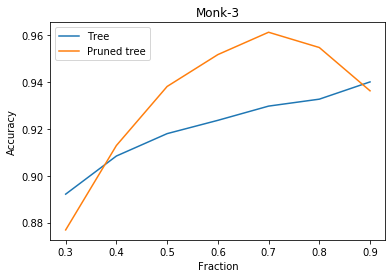

In [5]:
fraction = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] #of training data
iterations = 200
the_dataset = [m.monk1, m.monk2, m.monk3]
the_dataset_test = [m.monk1test, m.monk2test, m.monk3test]

def error(data, data_test, iterations, fraction):
    prune_error = []
    tree_error = []
    for i in range(iterations):
        data_train, data_val = partition(data, fraction)
        tree = buildTree(data_train, m.attributes)
        pruned_tree = complete_pruning(tree,data_val)
        prune_error.append(check(pruned_tree, data_test))
        tree_error.append(check(tree, data_test))

    return np.mean(tree_error), np.mean(prune_error)


tree_error_for_each_fraction = [[],[],[]]        #for each monk dataset
prune_error_for_each_fraction = [[],[],[]] 
for i in range(len(the_dataset)):
    for j in range(len(fraction)):
        tree_error_mean, prune_error_mean = error(the_dataset[i], the_dataset_test[i], iterations, fraction[j])
        tree_error_for_each_fraction[i].append(tree_error_mean)
        prune_error_for_each_fraction[i].append(prune_error_mean)


#MONK-1
plt.plot(fraction, tree_error_for_each_fraction[0][:])
plt.plot(fraction, prune_error_for_each_fraction[0][:])
plt.legend(['Tree','Pruned tree'])
plt.xlabel('Fraction')
plt.ylabel('Accuracy')
plt.title('Monk-1')
plt.show()

#MONK-3
plt.plot(fraction, tree_error_for_each_fraction[2][:])
plt.plot(fraction, prune_error_for_each_fraction[2][:])
plt.legend(['Tree','Pruned tree'])
plt.xlabel('Fraction')
plt.ylabel('Accuracy')
plt.title('Monk-3')
plt.show()



As the fraction increases, the classification accuracy of the tree increases, which was expected: the training dataset is larger.
We can see the tradeoff between training and validation: the pruning curve increases and then decreases.
Best fraction parameter: around 0.7 - 0.8
For Monk-3, pruning has a better accuracy because it allows to remove de noise (5% of misclassification)
